In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

C:\Users\hafizuddin\Anaconda3\lib\site-packages\numpy\core\__init__.py:29: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\hafizuddin\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
C:\Users\hafizuddin\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


In [3]:
df = pd.read_csv('salary_cleaned.csv')

In [4]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,Company_text,job_state,HQ,same_location,age,python_yn,R_yn,Spark_yn,AWS_yn,excel_yn
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.8,Tecolote Research\r\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,Tecolote Research\r\n,NM,CA,0,47,1,1,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\r\n\r\nI. General Summary\r\...,3.4,University of Maryland Medical System\r\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,University of Maryland Medical System\r\n,MD,MD,0,36,1,1,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\r\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,KnowBe4\r\n,FL,FL,1,10,1,1,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\r\nJob ID: 310709\r...,3.8,PNNL\r\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,PNNL\r\n,WA,WA,1,55,1,1,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions\r\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,Affinity Solutions\r\n,NY,NY,1,22,1,1,0,0,1


In [5]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'provided', 'min_salary', 'max_salary', 'average',
       'Company_text', 'job_state', 'HQ', 'same_location', 'age', 'python_yn',
       'R_yn', 'Spark_yn', 'AWS_yn', 'excel_yn'],
      dtype='object')

In [6]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'
		
## Job title and seniority 
		
##  Fix state Los Angeles 

##  Job description length 

##  Competitor count

## hourly wage to annual 

#remove new line from job title

In [7]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [8]:
df.job_simp.value_counts()

data scientist    279
na                184
data engineer     119
analyst           102
mle                22
manager            22
director           14
Name: job_simp, dtype: int64

In [9]:
df['seniority'] = df['Job Title'].apply(seniority)

In [10]:
df.seniority.value_counts()

na        520
senior    220
jr          2
Name: seniority, dtype: int64

In [11]:
# job description length
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))


In [12]:
#Competitor count
df['Competitors_count'] = df['Competitors'].apply(lambda x:len(x.split(',')) if x != '-1' else 'NaN')

In [13]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,age,python_yn,R_yn,Spark_yn,AWS_yn,excel_yn,job_simp,seniority,desc_len,Competitors_count
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.8,Tecolote Research\r\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,47,1,1,0,0,1,data scientist,na,2555,NaN
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\r\n\r\nI. General Summary\r\...,3.4,University of Maryland Medical System\r\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,36,1,1,0,0,0,data scientist,na,4828,NaN
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\r\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,10,1,1,1,0,1,data scientist,na,3495,NaN
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\r\nJob ID: 310709\r...,3.8,PNNL\r\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,55,1,1,0,0,0,data scientist,na,3926,3
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions\r\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,22,1,1,0,0,1,data scientist,na,2748,3


In [14]:
df['Competitors']

0                                                     -1
1                                                     -1
2                                                     -1
3      Oak Ridge National Laboratory, National Renewa...
4                   Commerce Signals, Cardlytics, Yodlee
5                      Digital Realty, CoreSite, Equinix
6                                                     -1
7                                                     -1
8                                                     -1
9                              Clicktripz, SmarterTravel
10                                                    -1
11                                                    -1
12                      Target, Costco Wholesale, Amazon
13                                                    -1
14                              Novartis, Baxter, Pfizer
15                                                    -1
16          bluebird bio, Agios Pharmaceuticals, Celgene
17                             

In [15]:
# hourly wage to annual consider 2000hrs work in year
df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly == 1 else x.min_salary, axis=1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly == 1 else x.max_salary, axis=1)

In [16]:
df[df.hourly == 1] [['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
165,1,34,48
177,1,42,68
197,1,36,50
202,1,42,68
210,1,30,50
246,1,34,48
271,1,42,68
337,1,36,50
345,1,48,78
357,1,42,68


In [17]:
df['Company_text'] = df.Company_text.apply(lambda x: x.replace('\n', '') and x.split('\r')[0])

In [18]:
df['Company_text']

0                          Tecolote Research
1      University of Maryland Medical System
2                                    KnowBe4
3                                       PNNL
4                         Affinity Solutions
5                                   CyrusOne
6                         ClearOne Advantage
7                                 Logic20/20
8                  Rochester Regional Health
9                                   <intent>
10                                      Wish
11                                   ManTech
12                                   Walmart
13                                    Yesler
14                    Takeda Pharmaceuticals
15                                   Audible
16                       Blueprint Medicines
17                                    h2o.ai
18                                      Nuna
19                        Pinnacol Assurance
20                                     Porch
21                                 Health IQ
22        

In [19]:
df.describe()

,Rating,Founded,hourly,provided,min_salary,max_salary,average,same_location,age,python_yn,R_yn,Spark_yn,AWS_yn,excel_yn,desc_len
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.358491,0.557951,46.591644,0.528302,0.981132,0.225067,0.237197,0.522911,3910.172507
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.885254,0.496965,53.778815,0.499535,0.136150,0.417908,0.425651,0.499812,1533.827777
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2834.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.000000,1.000000,24.000000,1.000000,1.000000,0.000000,0.000000,1.000000,3781.500000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.000000,1.000000,59.000000,1.000000,1.000000,0.000000,0.000000,1.000000,4772.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10146.000000


In [20]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'provided', 'min_salary', 'max_salary', 'average',
       'Company_text', 'job_state', 'HQ', 'same_location', 'age', 'python_yn',
       'R_yn', 'Spark_yn', 'AWS_yn', 'excel_yn', 'job_simp', 'seniority',
       'desc_len', 'Competitors_count'],
      dtype='object')

Text(0.5, 0.98, 'Rating')

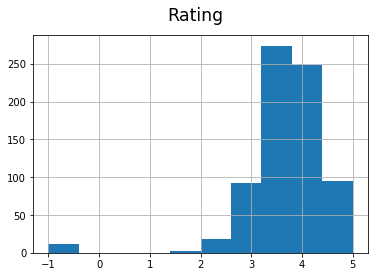

In [21]:
df.Rating.hist()
plt.suptitle('Rating', ha='center', fontsize='xx-large')

Text(0.5, 0.98, 'Average Salary')

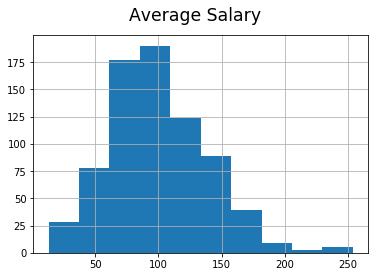

In [22]:
df.average.hist()
plt.suptitle('Average Salary', ha='center', fontsize='xx-large')

Text(0.5, 0.98, 'Company Age')

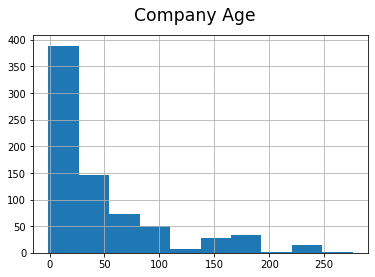

In [23]:
df.age.hist()
plt.suptitle('Company Age', ha='center', fontsize='xx-large')

Text(0.5, 0.98, 'Description Length (by character)')

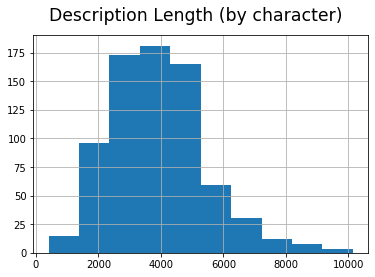

In [24]:
df.desc_len.hist()
plt.suptitle('Description Length (by character)', ha='center', fontsize='xx-large')

Text(0.5, 0.98, 'Company Age')

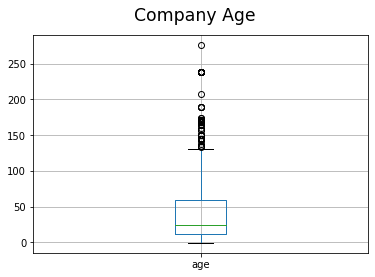

In [25]:
df.boxplot(column = ['age'])
plt.suptitle('Company Age', ha='center', fontsize='xx-large')

Text(0.5, 0.98, 'Average Salary(Annually)')

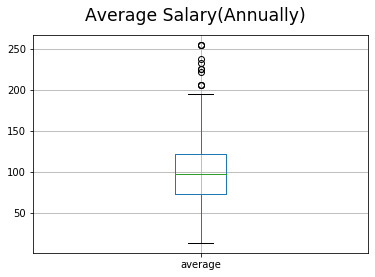

In [26]:
df.boxplot(column = ['average'])
plt.suptitle('Average Salary(Annually)', ha='center', fontsize='xx-large')

Text(0.5, 0.98, 'Rating')

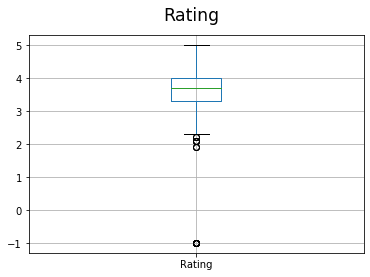

In [27]:
df.boxplot(column = ['Rating'])
plt.suptitle('Rating', ha='center', fontsize='xx-large')

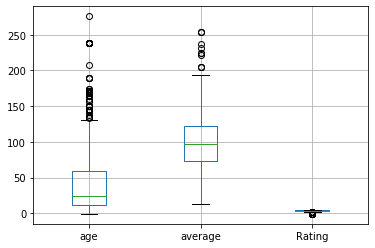

In [28]:
df.boxplot(column = ['age','average','Rating'])

In [29]:
df.rename(columns={'average':'avg_salary'} ,inplace=True)
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'provided', 'min_salary', 'max_salary', 'avg_salary',
       'Company_text', 'job_state', 'HQ', 'same_location', 'age', 'python_yn',
       'R_yn', 'Spark_yn', 'AWS_yn', 'excel_yn', 'job_simp', 'seniority',
       'desc_len', 'Competitors_count'],
      dtype='object')

In [30]:
corr = df[['age','avg_salary','Rating','desc_len','Competitors_count']].corr()
print(corr)

                 age  avg_salary    Rating  desc_len
age         1.000000    0.019379  0.021655  0.165090
avg_salary  0.019379    1.000000  0.013436  0.077743
Rating      0.021655    0.013436  1.000000 -0.012631
desc_len    0.165090    0.077743 -0.012631  1.000000


In [31]:
df[['age','avg_salary','Rating','desc_len','Competitors_count']]

,age,avg_salary,Rating,desc_len,Competitors_count
0,47,72,3.8,2555,NaN
1,36,87,3.4,4828,NaN
2,10,85,4.8,3495,NaN
3,55,76,3.8,3926,3
4,22,114,2.9,2748,3
5,20,95,3.4,3783,3
6,12,73,4.1,1808,NaN
7,15,114,3.8,3847,NaN
8,6,61,3.3,1561,NaN
9,11,140,4.6,4609,2


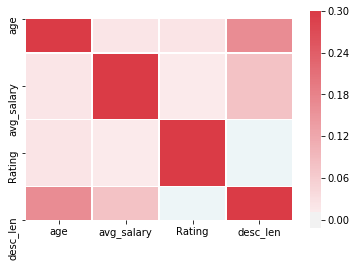

In [32]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, vmax=.3, center=0, cmap=cmap, square=True, linewidths=.5, cbar={"shrink":.5})

In [33]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'provided', 'min_salary', 'max_salary', 'avg_salary',
       'Company_text', 'job_state', 'HQ', 'same_location', 'age', 'python_yn',
       'R_yn', 'Spark_yn', 'AWS_yn', 'excel_yn', 'job_simp', 'seniority',
       'desc_len', 'Competitors_count'],
      dtype='object')

In [34]:
df_cat = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'Company_text', 
            'job_state','same_location', 'python_yn', 'R_yn','Spark_yn', 'AWS_yn', 'excel_yn', 'seniority']]

graph for Location: total = 200


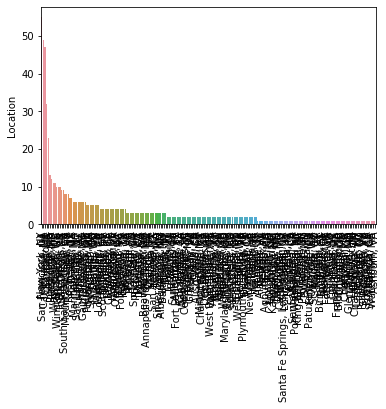

graph for Headquarters: total = 198


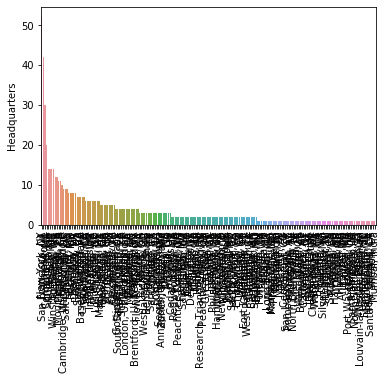

graph for Size: total = 9


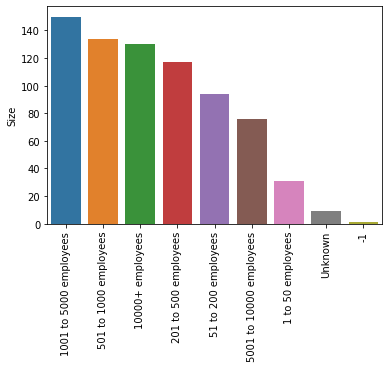

graph for Type of ownership: total = 11


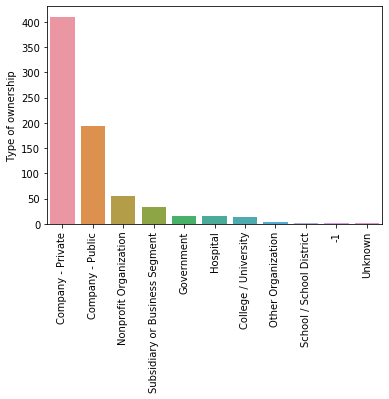

graph for Industry: total = 60


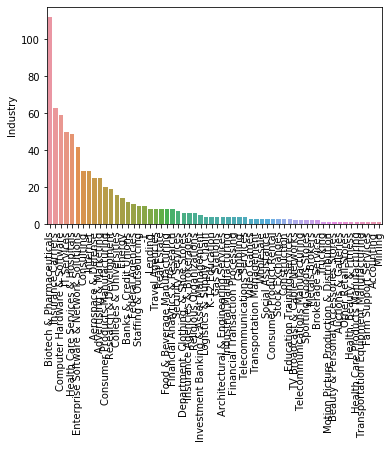

graph for Sector: total = 25


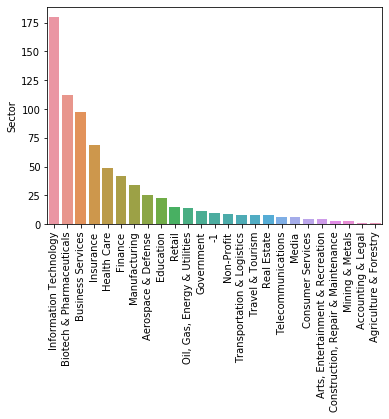

graph for Revenue: total = 14


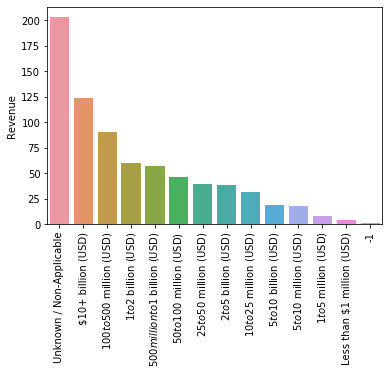

graph for Company_text: total = 343


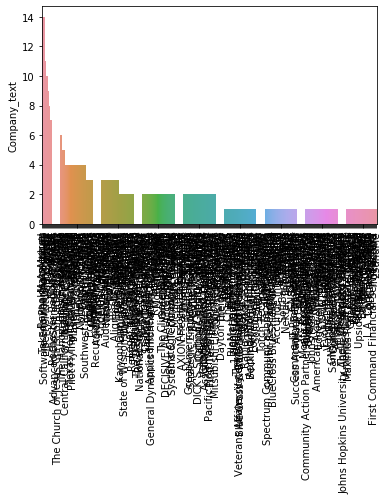

graph for job_state: total = 37


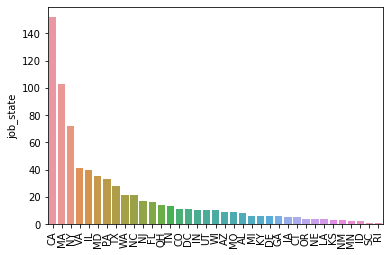

graph for same_location: total = 2


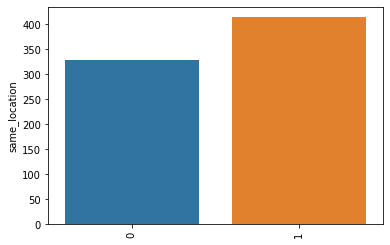

graph for python_yn: total = 2


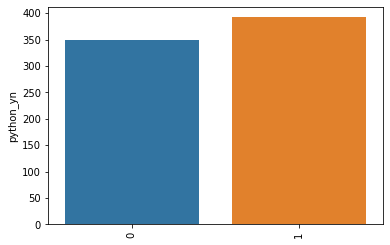

graph for R_yn: total = 2


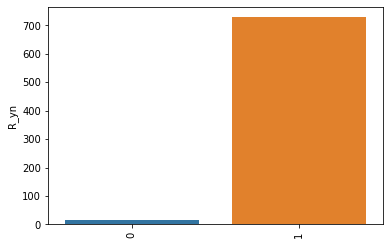

graph for Spark_yn: total = 2


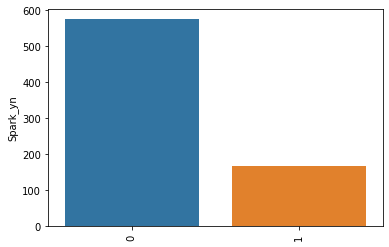

graph for AWS_yn: total = 2


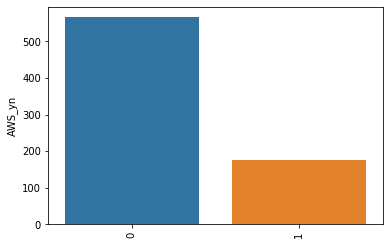

graph for excel_yn: total = 2


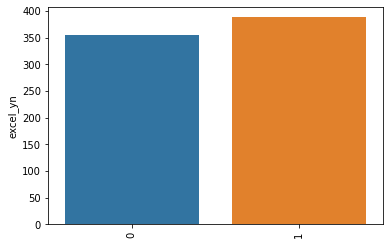

graph for seniority: total = 3


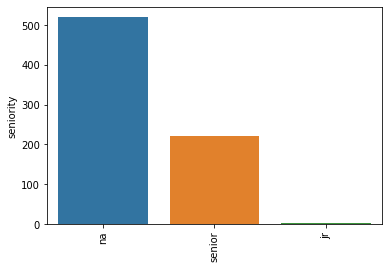

In [35]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Location: total = 20


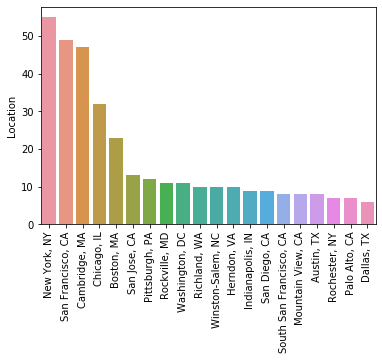

graph for Headquarters: total = 20


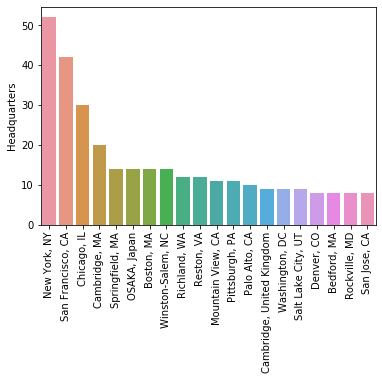

graph for Size: total = 9


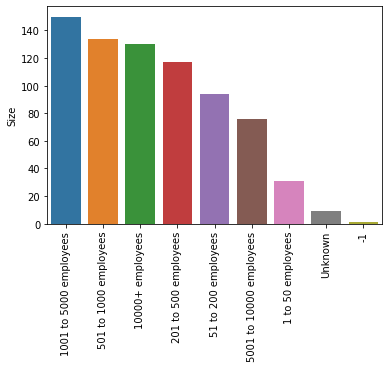

graph for Type of ownership: total = 11


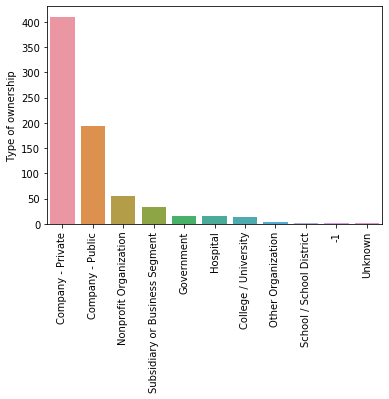

graph for Industry: total = 20


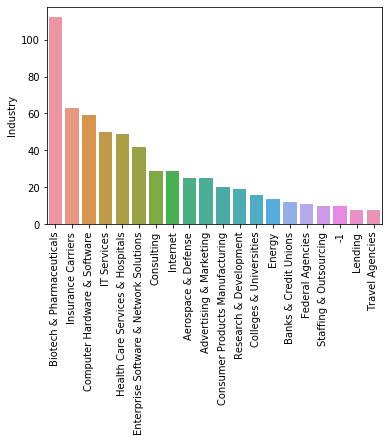

graph for Sector: total = 20


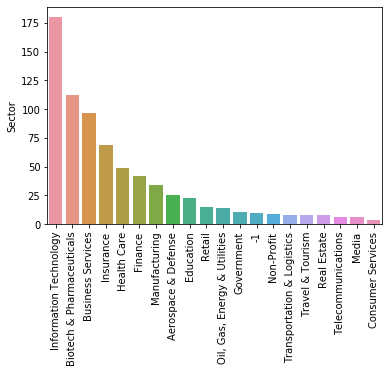

graph for Revenue: total = 14


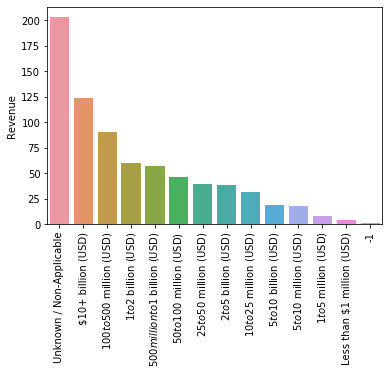

graph for Company_text: total = 20


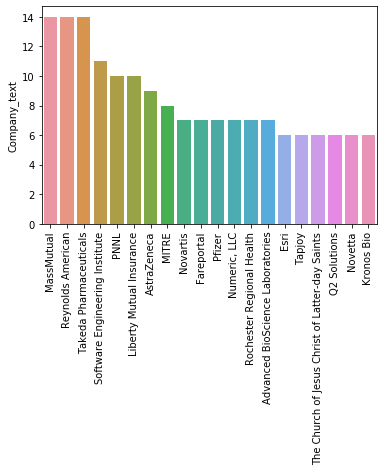

graph for job_state: total = 20


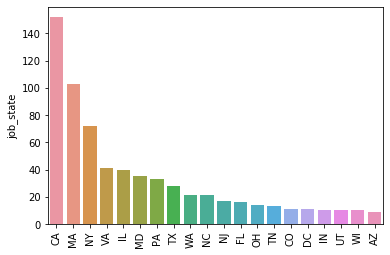

graph for same_location: total = 2


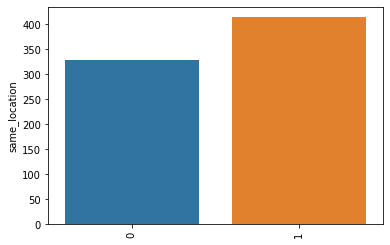

graph for python_yn: total = 2


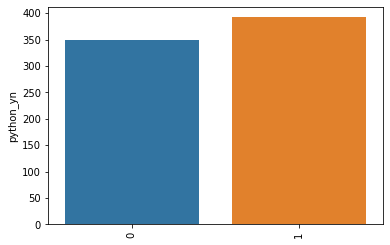

graph for R_yn: total = 2


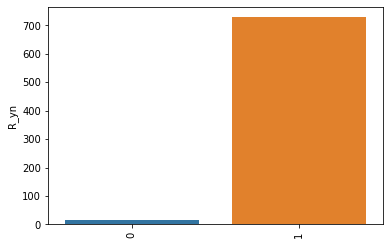

graph for Spark_yn: total = 2


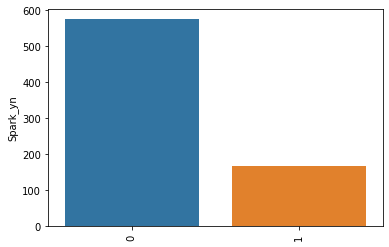

graph for AWS_yn: total = 2


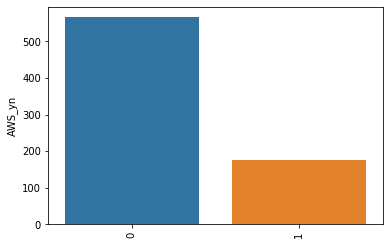

graph for excel_yn: total = 2


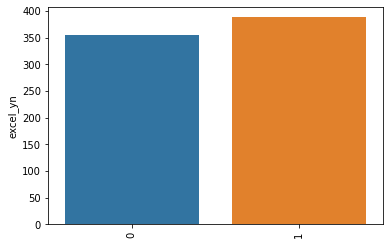

graph for seniority: total = 3


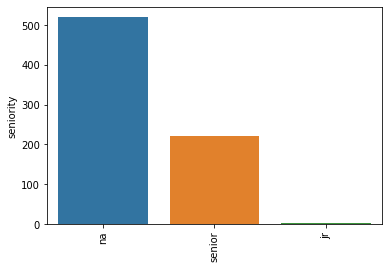

In [37]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [38]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'provided', 'min_salary', 'max_salary', 'avg_salary',
       'Company_text', 'job_state', 'HQ', 'same_location', 'age', 'python_yn',
       'R_yn', 'Spark_yn', 'AWS_yn', 'excel_yn', 'job_simp', 'seniority',
       'desc_len', 'Competitors_count'],
      dtype='object')

In [40]:
pd.pivot_table(df, index = 'job_simp' , values = 'avg_salary')

,avg_salary
job_simp,
analyst,65.607843
data engineer,105.159664
data scientist,117.315412
director,168.428571
manager,83.681818
mle,126.363636
na,84.510870


In [42]:
pd.pivot_table(df, index = ['job_simp','seniority'] , values = 'avg_salary')

avg_salary
job_simp       seniority            
analyst        jr          56.000000
               na          60.932432
               senior      78.777778
data engineer  na          96.463415
               senior     124.432432
data scientist jr         106.000000
               na         106.774194
               senior     138.750000
director       na         168.428571
manager        na          83.681818
mle            na         119.066667
               senior     142.000000
na             na          73.645669
               senior     108.719298

In [56]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

In [57]:
pd.pivot_table(df, index = ['job_state','job_simp'] , values = 'avg_salary').sort_values('job_state', ascending=False)

avg_salary
job_state job_simp                  
WI        na               54.000000
          data scientist  113.333333
          analyst          58.666667
WA        na               97.000000
          data scientist   99.470588
          analyst          54.000000
VA        na               79.000000
          mle              87.000000
          data scientist  108.277778
          data engineer    96.800000
          analyst          71.333333
UT        data engineer   100.333333
          analyst          54.750000
          data scientist  140.000000
TX        na               40.857143
          data scientist  100.538462
          data engineer   112.750000
TN        data scientist   96.000000
          data engineer   100.800000
          analyst          13.000000
SC        na               60.000000
RI        analyst         100.000000
PA        manager         109.333333
          data engineer    91.000000
          data scientist  113.166667
          analyst          62.375000
          mle             120.428571
          na               75.625000
OR        data scientist   98.000000
          data engineer    73.000000
OH        na               90.666667
          data scientist  105.000000
          analyst          53.500000
NY        na               81.250000
          mle             125.000000
          data scientist  115.025000
          data engineer    86.000000
          analyst          65.428571
NM        data scientist   74.000000
NJ        data scientist  106.500000
          analyst          83.333333
          data engineer   112.000000
          manager         109.000000
          director        161.000000
          na               82.000000
NE        na               40.750000
NC        na               90.500000
          data scientist  116.666667
          data engineer   103.833333
MO        na               72.000000
          manager          40.000000
          data scientist  127.333333
          analyst          61.000000
MN        data engineer    95.000000
          analyst          76.000000
MI        manager          87.000000
          data scientist  106.500000
MD        na               88.562500
          data scientist  108.923077
          data engineer   109.000000
          analyst          80.333333
MA        na              107.130435
          manager          71.600000
          director        117.833333
          data scientist  113.366667
          data engineer   107.000000
          analyst          59.000000
LA        analyst          48.000000
          data engineer    70.000000
          na               20.000000
KY        na              103.000000
          data scientist   84.000000
KS        mle              87.000000
IN        na               68.500000
          data scientist   84.000000
          data engineer   114.000000
IL        analyst          66.333333
          na               56.666667
          mle             133.000000
          director        221.500000
          data scientist  117.000000
          data engineer    95.750000
ID        analyst          56.000000
IA        analyst          43.000000
          data engineer   102.333333
GA        data scientist   81.000000
          na               80.000000
FL        data scientist   97.285714
          data engineer    91.333333
          analyst          47.333333
DE        na               27.000000
DC        data scientist  148.800000
          data engineer    84.750000
          analyst          63.500000
CT        na               62.000000
          data scientist   84.000000
CO        mle             100.000000
          data engineer    99.000000
          analyst          29.000000
          na               31.000000
          data scientist  108.333333
CA        na               99.629630
          mle             177.200000
          manager          80.333333
          data scientist  142.279412
          data engineer   129.360000
          analyst          84.

In [64]:
pd.pivot_table(df[df.job_simp == 'data scientist'], index = 'job_state', values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
job_state,
DC,148.800000
CA,142.279412
UT,140.000000
MO,127.333333
IL,117.000000
NC,116.666667
NY,115.025000
MA,113.366667
WI,113.333333


In [65]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'provided', 'min_salary', 'max_salary', 'avg_salary',
       'Company_text', 'job_state', 'HQ', 'same_location', 'age', 'python_yn',
       'R_yn', 'Spark_yn', 'AWS_yn', 'excel_yn', 'job_simp', 'seniority',
       'desc_len', 'Competitors_count'],
      dtype='object')

In [ ]:
# rating, industry, sector, revenue, number of comp, hourly,
# employer provided, python, r, spark, aws, excel, desc_len, Type of onwership

In [69]:
df_pivots = df[['Rating','Industry','Sector','Revenue','Competitors','hourly','provided','python_yn','R_yn','Spark_yn','AWS_yn',
              'excel_yn','desc_len','Type of ownership','avg_salary']]

In [75]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots, index = i, values = 'avg_salary').sort_values('avg_salary', ascending=False))

Rating
        avg_salary
Rating            
-1.0    136.000000
 5.0    134.600000
 2.5    119.500000
 4.5    117.428571
 4.1    116.210526
 3.9    112.904762
 2.6    108.916667
 4.4    108.303030
 3.2    105.228571
 4.0    105.127660
 3.5    104.571429
 3.7    103.852459
 4.7    103.612903
 4.3    102.156250
 3.3    101.512821
 4.2    100.115385
 2.2     97.500000
 4.6     97.100000
 3.8     96.573770
 2.1     95.400000
 3.4     92.818182
 1.9     87.000000
 3.1     86.200000
 3.0     85.294118
 3.6     85.152174
 2.8     83.571429
 2.7     83.142857
 2.3     81.500000
 2.9     80.944444
 4.8     80.000000
 2.4     59.714286
Industry
                                          avg_salary
Industry                                            
Other Retail Stores                       163.000000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Health, Beauty, & Fitness                 139.000000
Telecommunications Services            

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [80]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python_yn', values = 'avg_salary', aggfunc = 'count')

python_yn,0,1
Revenue,,
$1 to $2 billion (USD),16.0,44.0
$1 to $5 million (USD),1.0,7.0
$10 to $25 million (USD),16.0,16.0
$10+ billion (USD),66.0,58.0
$100 to $500 million (USD),47.0,44.0
$2 to $5 billion (USD),17.0,22.0
$25 to $50 million (USD),24.0,16.0
$5 to $10 billion (USD),9.0,10.0
$5 to $10 million (USD),9.0,9.0
